In [1]:
import pandas as pd
import numpy as np

In [2]:
df_miles_driven = pd.read_csv("miles-driven.csv",sep="|")
print(df_miles_driven.info())
df_miles_driven.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 948.0+ bytes
None


,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [3]:
car_accidents = pd.read_csv("road-accidents.csv",comment="#",sep="|")
print(car_accidents.info())
car_accidents.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol   
count             51.000000        51.000000          51.000000  \
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


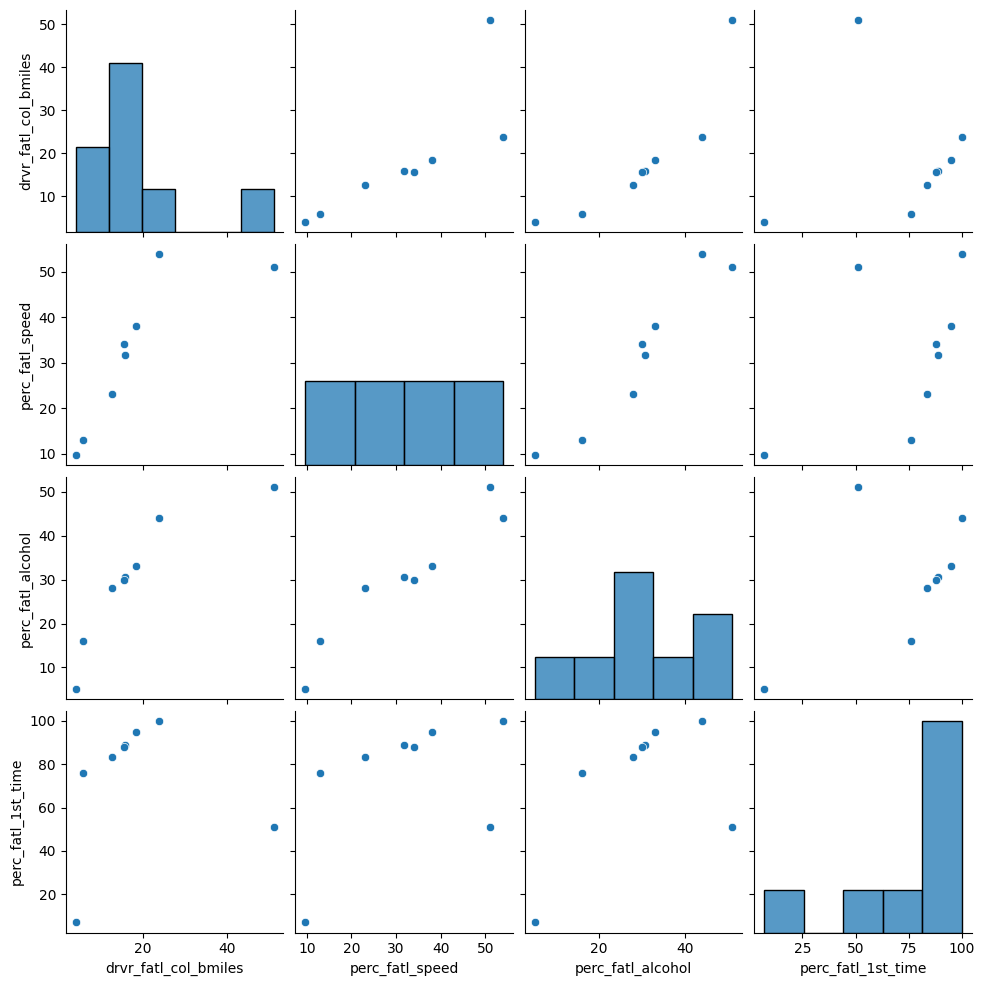

In [4]:
# import seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline

stats = car_accidents.describe()
print(stats)

sns.pairplot(stats)

In [5]:
correlation = car_accidents.iloc[:,1:].corr(method="pearson")
correlation

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [6]:
from sklearn.linear_model import LinearRegression

features = car_accidents[["perc_fatl_speed",	"perc_fatl_alcohol",	"perc_fatl_1st_time"]]
target = car_accidents["drvr_fatl_col_bmiles"]

lr_model = LinearRegression()
lr_model.fit(features,target)

LinearRegression()

In [7]:
lr_model.coef_

array([-0.04180041,  0.19086404,  0.02473301])

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

([<matplotlib.axis.XTick at 0x202585b5bd0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

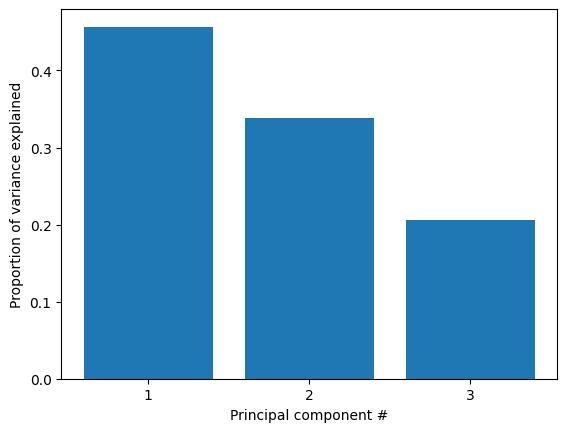

In [9]:
import matplotlib.pyplot as plt

pca=PCA()
pca.fit(scaled_features)
plt.bar(range(1, pca.n_components_ + 1),pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

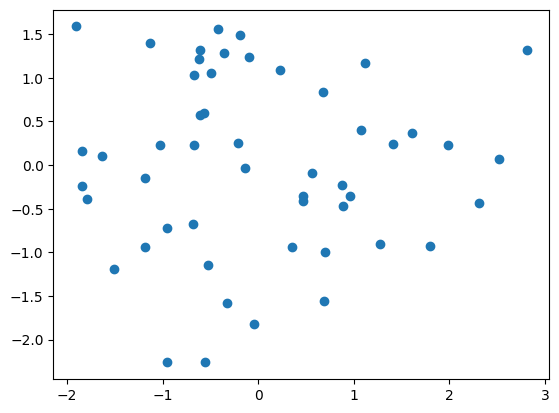

In [10]:
pca = PCA(n_components=2)
p_comps = pca.fit_transform(scaled_features)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)

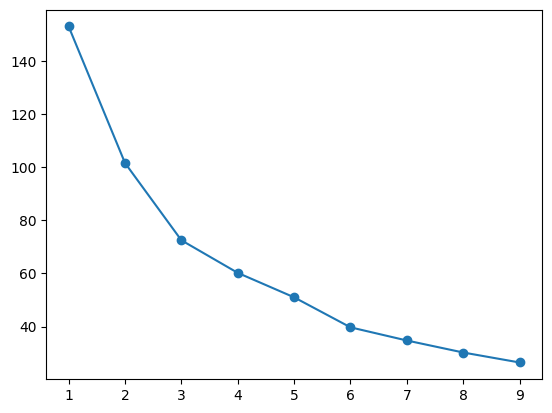

In [11]:
from sklearn.cluster import KMeans

k = range(1,10)
inertias = []
for i in k:
    km = KMeans(n_clusters=i,random_state=40)
    km.fit(scaled_features)
    inertias.append(km.inertia_)

plt.plot(k,inertias,marker="o")

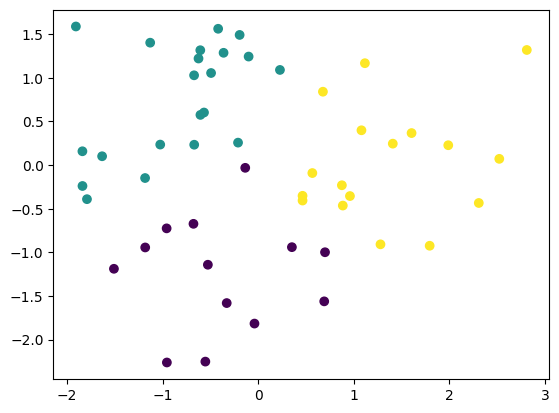

In [12]:
km = KMeans(n_clusters=3,random_state=42)
km.fit(scaled_features)

plt.scatter(p_comp1, p_comp2,c=km.labels_)

In [13]:
# Number of accidents within each cluster
car_accidents["clusters"] = km.labels_

car_accidents_miles =  pd.merge(car_accidents,df_miles_driven,on="state")
car_accidents_miles.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,clusters,million_miles_annually
0,Alabama,18.8,39,30,80,2,64914
1,Alaska,18.1,41,25,94,1,4593
2,Arizona,18.6,35,28,96,1,59575
3,Arkansas,22.4,18,26,95,1,32953
4,California,12.0,35,28,89,1,320784


,clusters,sum,mean,count
0,0,11495.9438,884.303369,13
1,1,19313.0097,919.667129,21
2,2,14826.2569,872.132759,17


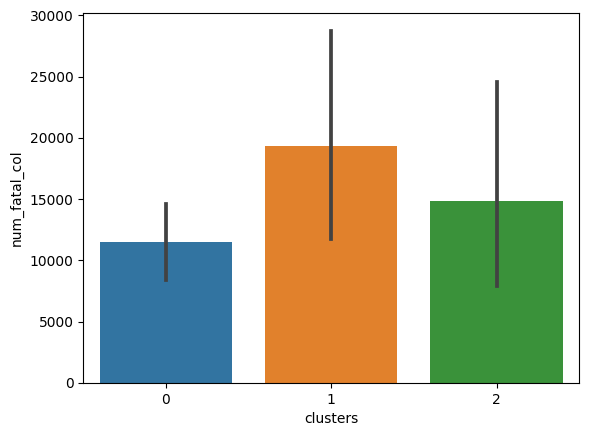

In [16]:
car_accidents_miles["num_fatal_col"] = car_accidents_miles["drvr_fatl_col_bmiles"] * car_accidents_miles["million_miles_annually"]/1000

import seaborn as sns
sns.barplot(x="clusters",y="num_fatal_col",data=car_accidents_miles,estimator=sum)

car_accidents_miles.groupby("clusters")["num_fatal_col"].agg(["sum","mean","count"]).reset_index()
